In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("ObesityDataSet.csv")

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2110.000000,2107.000000,2111.000000,2110.000000,2110.000000,2111.000000,2109.000000,2110.00000
mean,24.314170,1.701804,86.586058,2.419242,2.686427,2.008011,1.009833,0.65723
std,6.347063,0.093297,26.191172,0.533975,0.777357,0.612953,0.849607,0.60837
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,19.946718,1.630000,65.473343,2.000000,2.660328,1.584812,0.127425,0.00000
50%,22.783646,1.700627,83.000000,2.386464,3.000000,2.000000,1.000000,0.62535
75%,26.000000,1.768536,107.430682,3.000000,3.000000,2.477420,1.666390,1.00000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.00000


In [8]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,NaN,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.isna().sum()

Gender                            0
Age                               1
Height                            4
Weight                            0
family_history_with_overweight    1
FAVC                              2
FCVC                              1
NCP                               1
CAEC                              1
SMOKE                             1
CH2O                              0
SCC                               1
FAF                               2
TUE                               1
CALC                              3
MTRANS                            2
NObeyesdad                        0
dtype: int64

In [10]:
df.isnull().sum()

Gender                            0
Age                               1
Height                            4
Weight                            0
family_history_with_overweight    1
FAVC                              2
FCVC                              1
NCP                               1
CAEC                              1
SMOKE                             1
CH2O                              0
SCC                               1
FAF                               2
TUE                               1
CALC                              3
MTRANS                            2
NObeyesdad                        0
dtype: int64

### Data Preprocessing

<Axes: >

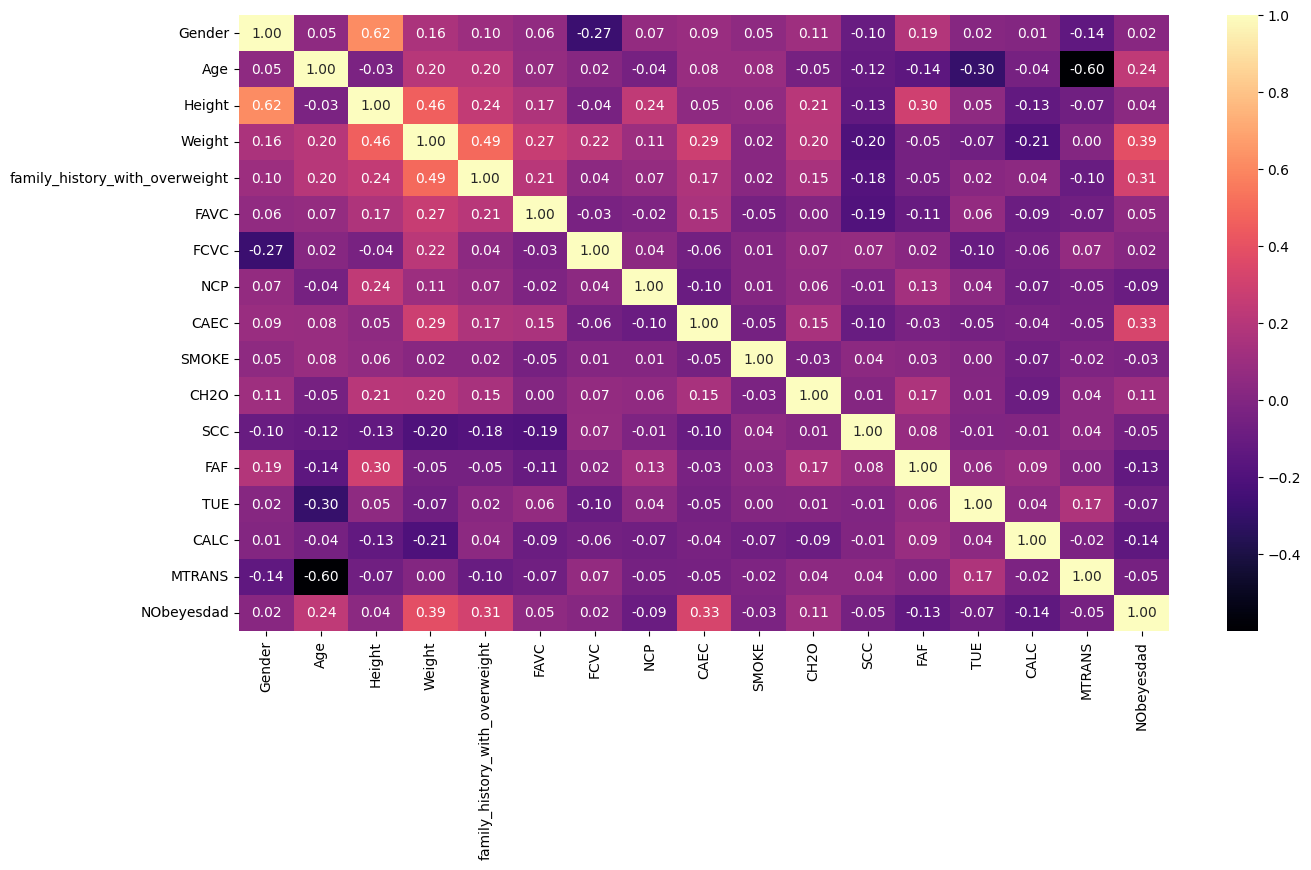

In [14]:
from sklearn.preprocessing import LabelEncoder

# Select only numeric columns for correlation calculation
# numeric_df = df.select_dtypes(include=[np.number])

# Encode categorical columns to numeric values
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ["Age","Height","Weight"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', MinMaxScaler((0,1)))
])

In [31]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"] = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])


In [33]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])


### Data Splitting

In [35]:
from sklearn.model_selection import train_test_split

data = df[["Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"]].iloc[:,:]
y = df[["NObeyesdad"]].iloc[:,-1].values

X = ct.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Model Parameter Grids

In [36]:
lr_param_grid = [{'penalty': ['l1', 'l2'],
                   'C': [0.1, 0.5, 1],
                   'solver': ['liblinear']}]

dt_param_grid = [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': [1, 2, 3, 5],
                   'max_depth': [1, 2, 3, 5],
                   'min_samples_split': [2, 3, 5]}]

rf_param_grid = [{'min_samples_leaf': [1, 2, 3, 5],
                   'max_depth': [1, 2, 3, 5],
                   'min_samples_split': [2, 3, 5]}]

knn_param_grid = [{'n_neighbors': [3, 5],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']}]

svm_param_grid = [{'max_iter': [10000],
                    'C': [1, 2, 3, 5]}]

xgb_param_grid = [{'max_depth': [1, 2, 3, 5],
                    'min_child_weight': [1, 2],
                    'subsample': [0.1, 0.5, 1],
                    'learning_rate': [0.1, 0.5, 1],
                    'n_estimators': [3, 10]}]


### Model Training and Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

def find_best_params_and_algorithm(scoring,n_jobs=-1,cv=3): 
    # my result_df data fream
    result_df = pd.DataFrame(columns=["name","score","params"])


    print("LogisticRegression section")
    lr_grid_search = GridSearchCV(estimator=LogisticRegression(),
        param_grid=lr_param_grid,
        scoring=scoring,
        n_jobs=n_jobs,
        cv=cv)

    lr_grid_search.fit(X_train,y_train)

    result = {'name':"LogisticRegression",'score':lr_grid_search.best_score_,"params":lr_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


    print("DecisionTreeClassifier section")
    dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
        param_grid=dt_param_grid,
        scoring=scoring,
        n_jobs=n_jobs,
        cv=cv)

    dt_grid_search.fit(X_train,y_train)

    result = {'name':"DecisionTreeClassifier",'score':dt_grid_search.best_score_,"params":dt_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


    print("RandomForestClassifier section")
    rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
            param_grid=rf_param_grid,
            scoring=scoring,
            n_jobs=n_jobs,
            cv=cv)

    rf_grid_search.fit(X_train,y_train)

    result = {'name':"RandomForestClassifier",'score':rf_grid_search.best_score_,"params":rf_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


    print("KNN section")
    knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
            param_grid=knn_param_grid,
            scoring=scoring,
            n_jobs=n_jobs,
            cv=cv)

    knn_grid_search.fit(X_train,y_train)
    
    result = {'name':"KNN",'score':knn_grid_search.best_score_,"params":knn_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


    print("LinearSVC section")
    svc_grid_search = GridSearchCV(estimator=LinearSVC(),
            param_grid=svm_param_grid,
            scoring=scoring,
            n_jobs=n_jobs,
            cv=cv)

    svc_grid_search.fit(X_train,y_train)
    
    result = {'name':"LinearSVC",'score':svc_grid_search.best_score_,"params":svc_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


    print("XGBClassifier section")
    xgb_grid_search = GridSearchCV(estimator=XGBClassifier(),
            param_grid=xgb_param_grid,
            scoring=scoring,
            n_jobs=n_jobs,
            cv=cv)

    xgb_grid_search.fit(X_train,y_train)
    
    result = {'name':"XGBClassifier",'score':xgb_grid_search.best_score_,"params":xgb_grid_search.best_params_}
    result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)

    return result_df

result_for_f1_search = find_best_params_and_algorithm("accuracy")
result_for_f1_search.sort_values(by='score', ascending=False)

LogisticRegression section


/var/folders/p6/tt6fjkb91m123l2cly9x3bb00000gn/T/ipykernel_38570/2472622110.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


DecisionTreeClassifier section
RandomForestClassifier section
KNN section
LinearSVC section


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_clas

XGBClassifier section


,name,score,params
5,XGBClassifier,0.950099,"{'learning_rate': 1, 'max_depth': 5, 'min_chil..."
3,KNN,0.827551,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei..."
1,DecisionTreeClassifier,0.824374,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
0,LogisticRegression,0.767527,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}"
4,LinearSVC,0.696160,"{'C': 1, 'max_iter': 10000}"
2,RandomForestClassifier,0.602004,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def find_best_params_and_algorithm(scoring, X_train, y_train, X_test, y_test, n_jobs=-1, cv=3): 
    result_df = pd.DataFrame(columns=["name","score","params", "accuracy", "precision", "recall", "f1_score", "confusion_matrix"])

    classifiers = [
        ("LogisticRegression", LogisticRegression(), lr_param_grid),
        ("DecisionTreeClassifier", DecisionTreeClassifier(), dt_param_grid),
        ("RandomForestClassifier", RandomForestClassifier(), rf_param_grid),
        ("KNN", KNeighborsClassifier(), knn_param_grid),
        ("LinearSVC", LinearSVC(), svm_param_grid),
        ("XGBClassifier", XGBClassifier(), xgb_param_grid)
    ]

    for name, model, param_grid in classifiers:
        print(f"{name} section")
        grid_search = GridSearchCV(estimator=model,
            param_grid=param_grid,
            scoring=scoring,
            n_jobs=n_jobs,
            cv=cv)

        grid_search.fit(X_train, y_train)

        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        result = {'name': name, 'score': grid_search.best_score_, 'params': grid_search.best_params_,
                  'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1,
                  'confusion_matrix': cm}

        result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)

    return result_df

result_df = find_best_params_and_algorithm("accuracy", X_train, y_train, X_test, y_test)
result_df.sort_values(by='score', ascending=False)


LogisticRegression section


/var/folders/p6/tt6fjkb91m123l2cly9x3bb00000gn/T/ipykernel_38570/444780839.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame([result])], ignore_index=True)


DecisionTreeClassifier section
RandomForestClassifier section
KNN section
LinearSVC section


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_clas

XGBClassifier section


,name,score,params,accuracy,precision,recall,f1_score,confusion_matrix
5,XGBClassifier,0.950099,"{'learning_rate': 1, 'max_depth': 5, 'min_chil...",0.965909,0.966389,0.965909,0.965989,"[[65, 2, 0, 0, 0, 0, 0], [1, 59, 0, 0, 0, 3, 0..."
3,KNN,0.827551,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.820076,0.844625,0.820076,0.825241,"[[55, 12, 0, 0, 0, 0, 0], [3, 49, 4, 0, 0, 5, ..."
1,DecisionTreeClassifier,0.823111,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.839015,0.849132,0.839015,0.838866,"[[61, 6, 0, 0, 0, 0, 0], [2, 48, 0, 0, 0, 9, 4..."
0,LogisticRegression,0.767527,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.780303,0.788142,0.780303,0.774787,"[[62, 5, 0, 0, 0, 0, 0], [0, 55, 2, 0, 0, 2, 4..."
4,LinearSVC,0.696160,"{'C': 1, 'max_iter': 10000}",0.715909,0.707218,0.715909,0.691697,"[[55, 12, 0, 0, 0, 0, 0], [0, 61, 1, 0, 0, 1, ..."
2,RandomForestClassifier,0.617182,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.562500,0.727924,0.562500,0.535974,"[[37, 13, 14, 0, 3, 0, 0], [0, 51, 10, 0, 1, 0..."
